In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import math
import numpy as np

##### **Represent Complex Numbers in Python**

In [2]:
z = 2 + 1j* 1
# OR
z = complex ( 2, 1 )
# OR
z = complex( '2+1j')

print(z)

(2+1j)


##### **Find the angle of the complex number with the Real Axis**

##### **Represent Complex Numbers in Graph**

In [3]:
#  Pythagorean theorem
angle = math.atan (np.imag (z) / np.real (z))
# OR
angle = np.angle (z)

print ('Angle : ', angle)

Angle :  0.4636476090008061


In [4]:
def RadtoDegree (angle) :
    return angle * 180/math.pi

In [5]:
def PrettyGraph (x1, y1, x2, y2) :
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.grid (True)
    plt.axis ('square')
    plt.axis ([x1, x2, y1, y2])

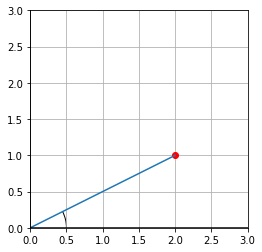

In [6]:
fg, ax = plt.subplots (1, 1)

pac = mpatches.Arc ([0, 0], 1, 1, angle = 0, theta1 = 0, theta2 = RadtoDegree (angle))
ax.add_patch(pac)

ax.axis([-2, 2, -2, 2])
ax.set_aspect("equal")

plt.plot (np.real (z), np.imag (z), 'ro')
plt.plot ((0, np.real (z)), (0, np.imag(z)))

# Make the Graphs Pretty
PrettyGraph (0, 0, 3, 3)

##### **Magnitude of Complex Numbers**

In [7]:
magnitude = np.sqrt ( np.real ( z )**2 + np.imag ( z )**2 )
# OR
magnitude = np.abs ( z )

print ( 'Magnitude : ', magnitude )

Magnitude :  2.23606797749979


##### **Complex Numbers in Eulers form**

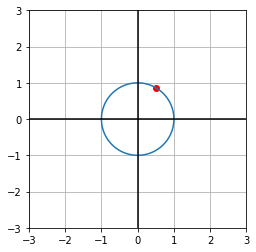

In [8]:
# e ^ ix = cos (x) + i * sin (x)
# Each point on e ^ ix corresponds to the circumference of a unit circle

k = np.pi/3

plt.plot (np.cos (k), np.sin (k), 'ro')

x = np.linspace (-np.pi, np.pi, num = 100)
plt.plot (np.cos (x), np.sin (x))

PrettyGraph (-3, -3, 3, 3)

4.0
1.0471975511965976


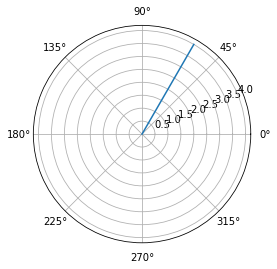

In [10]:
m = 4
k = np.pi/3

compnum = m * np.exp (complex (0, k))

magnitude = np.abs (compnum)
phase = np.angle (compnum)

print (magnitude)
print (phase)

plt.polar ([phase, phase], [0, magnitude])

##### **Complex Sine Wave With Separate Real and Imaginary Part**

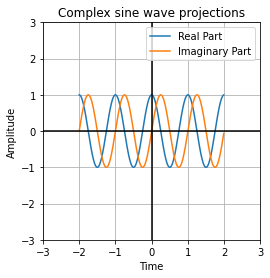

In [11]:
time  = np.arange(-2, 2, 0.01)

frequency = 1
amplitude = 1
phase = 0

# Complex Sine Wave
csw = amplitude * np.exp (1j* (2 * np.pi * frequency * time + phase))

plt.plot (time, np.real (csw), label = 'Real Part')
plt.plot (time, np.imag (csw), label = 'Imaginary Part')
plt.xlabel ('Time'), plt.ylabel ('Amplitude')
plt.title ('Complex sine wave projections')
plt.legend ()

PrettyGraph (-3, -3, 3, 3)

##### **Complex Sine Wave in 3D**

Text(0.5, 0.92, '3D Complex Sine Wave')

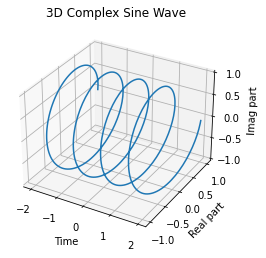

In [12]:
fig = plt.figure ()
ax = plt.axes (projection = '3d')
ax.plot (time, np.real (csw), np.imag (csw))

ax.set_xlabel ('Time')
ax.set_ylabel ('Real part')
ax.set_zlabel ('Imag part')

ax.set_title('3D Complex Sine Wave')

##### **Dot Product**
##### `(x1, x2, x3).(y1, y2, y3) = x1 * y1 + x2 * y2 + x3 * y3`

In [13]:
v1 = [1, 2, 1]
v2 = [1, 1, 1]

dotProduct = sum (np.multiply (v1, v2))

print ('Dot Product : ', dotProduct)

Dot Product :  4


##### **Dot Product of Sine Waves**

In [14]:
time  = np.arange (0, 2, 0.01)

frequency1 = 5
frequency2 = 5

amplitude1 = 2
amplitude2 = 2

phase1 = np.pi/2
phase2 = np.pi/2

sineWave1 = amplitude1 * np.sin (2 * np.pi * frequency1 * time + phase1)
sineWave2 = amplitude2 * np.sin (2 * np.pi * frequency2 * time + phase2)

dotProduct = np.dot (sineWave1, sineWave2)

print ('Dot Product : ', dotProduct)

Dot Product :  399.99999999999994


##### **Simulate a Signal**

In [38]:
def GetFrequency () :
    value = 3 + np.random.randint (7)
    return value

def GetPhase () :
    value = np.random.rand ()
    newValue = value * np.pi
    return newValue

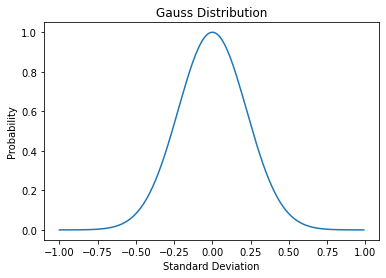

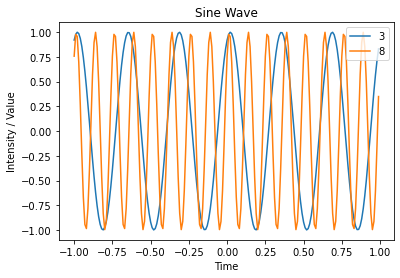

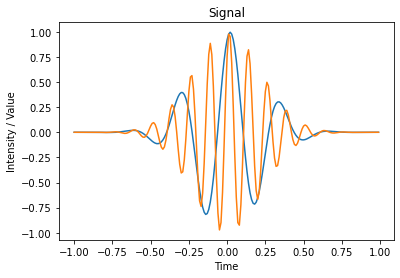

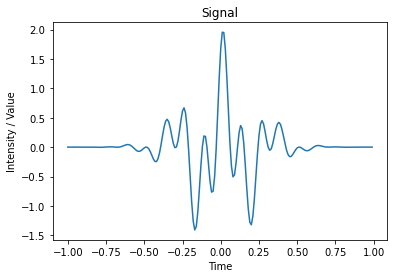

In [53]:
sineWaves = []
signals = []
signalFinal = 0
frequencies = []

numSignals = 2
time = np.arange (-1, 1, 0.01)

# Create a Gauss Distribution Like Curve
gaussDistribution  = np.exp ((-time**2) / 0.1)

plt.figure ()
plt.xlabel ('Standard Deviation')
plt.ylabel ('Probability')
plt.title ('Gauss Distribution')
plt.plot (time, gaussDistribution)

while numSignals > 0 :
    numSignals = numSignals - 1
    
    # Signal Parameters
    phase = GetPhase ()
    frequency = GetFrequency ()
    
    # Create a Sine Wave
    sineWave = np.sin (2 * np.pi * frequency * time + phase)
    frequencies.append (frequency)
    sineWaves.append (sineWave)
    
    # Create a Signal
    signal = np.multiply (sineWave, gaussDistribution)
    signals.append (signal)

plt.figure ()
for sineWave in sineWaves :
    plt.xlabel ('Time')
    plt.ylabel ('Intensity / Value')
    plt.title ('Sine Wave')
    plt.plot (time, sineWave)
    plt.legend (frequencies)
    
plt.figure ()
for signal in signals :
    plt.xlabel ('Time')
    plt.ylabel ('Intensity / Value')
    plt.title ('Signal')
    plt.plot (time, signal)
    signalFinal = np.add (signalFinal, signal)
    
plt.figure ()
plt.xlabel ('Time')
plt.ylabel ('Intensity / Value')
plt.title ('Signal')
plt.plot (time, signalFinal)

##### **Frequency Domain Graph**

<StemContainer object of 3 artists>

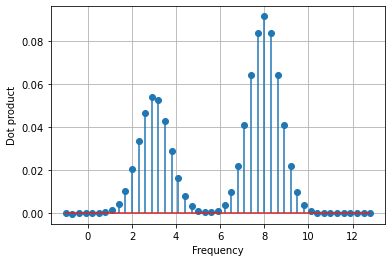

In [54]:
sineFrequency = np.arange (-1, 13, 0.3)
dotProduct = np.zeros (len (sineFrequency))

for i in range (1, len (dotProduct)) :
    sineWave = np.sin (2 * np.pi * sineFrequency [i] * time)
    dotProduct [i] = np.dot (sineWave, signalFinal) / len (time)

plt.xlabel ('Frequency')
plt.ylabel ('Dot product')
plt.grid ()
plt.stem (sineFrequency, dotProduct)

##### **Finding Dot Product in Complex Form**

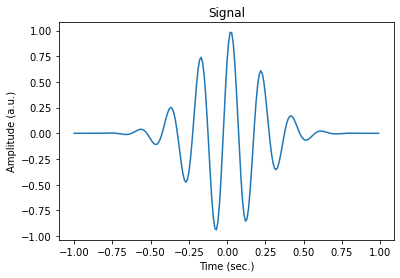

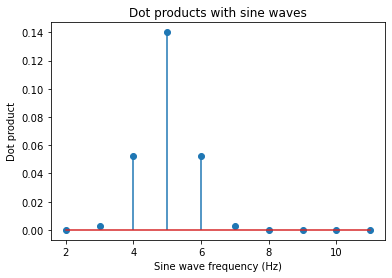

In [63]:
phase = np.pi / 4
frequency = 5
time  = np.arange (-1, 1, 0.01)

sineWave  = np.sin (2 * np.pi * frequency * time + phase)
gaussDistribution  = np.exp ((-time**2) / 0.1)
signal = np.multiply (sineWave, gaussDistribution)

# Sine Wave Frequencies
sineFrequencies = np.arange (2, 12, 1)

# Plot Signal in Time Domain
plt.plot (time, signal)
plt.xlabel ('Time (sec.)')
plt.ylabel ('Amplitude (a.u.)')
plt.title ('Signal')
plt.show ()


# Initialize Dot Products Vector
dotProducts = np.zeros (len (sineFrequencies))

for i in range (1, len (dotProducts)) :
    
    # Create Sine Wave in Complex Number Notation
    sineWave = np.exp (1j* 2 * np.pi * sineFrequencies[i] * time)
    
    # Compute Dot Prodct
    dotProducts [i] = np.abs (np.dot (sineWave, signal) / len (time))

# # Plot in Frequency Domain
plt.stem (sineFrequencies, dotProducts)
plt.xlabel ('Sine wave frequency (Hz)')
plt.ylabel('Dot product')
plt.title ('Dot products with sine waves')
plt.show()